# Advanced plotting examples with Matplotlib

The following examples are taken from the examples section at [matplotlib.org](http://matplotlib.org/gallery.html).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

In [2]:
#%pylab inline

## Plot some bars of random sizes and colors in a polar chart

This example based on [polar_bar_demo.py](http://matplotlib.org/examples/pie_and_polar_charts/polar_bar_demo.html) from the above gallery.

First, we define the number of bars, make our $\theta$ coordinate, and generate random radii and widths:

In [3]:
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

Next we create a polar bar chart with our random variables. We also use a colormap to color-code the bars by radius. 

At the end, we ``show()`` the result.

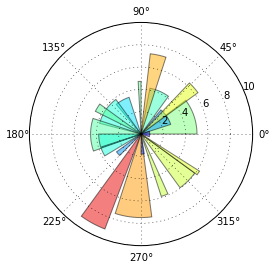

In [4]:
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.5)

plt.show()

## Display a vector field

This example is based on [quiver_demo.py](http://matplotlib.org/examples/pylab_examples/quiver_demo.html)

Here we are going to work through just one of the plots from that page. This type of plot is called a "quiver" plot (because it is full of arrows), and is useful for indicating the direction information when displaying a vector field.

The U,V field we will be displaying is $(U,V) = (\cos(x) ,\sin(y) )$ on $[0,2\pi ]\times [0,2\pi]$

In [5]:
from numpy import meshgrid, arange, cos, sin, pi
X,Y = meshgrid( arange(0,2*pi,.2),arange(0,2*pi,.2) )
U = cos(X)
V = sin(Y)

To reduce the number of arrows we plot a ``quiver`` of every third data point in our mesh.

``quiverkey`` lets us put a symbol marker label, and we can even use basic LaTeX notation.

We also make a normal plot on the same chart, using black dots, to indicate the actual location of each data point in our mesh.

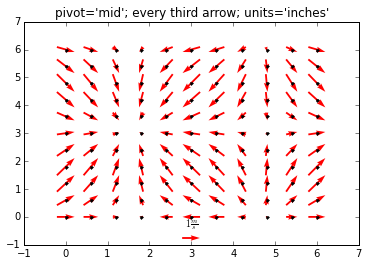

In [6]:
Q = plt.quiver( X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],
            pivot='mid', color='r', units='inches' )
qk = plt.quiverkey(Q, 0.5, 0.03, 1, r'$1 \frac{m}{s}$', fontproperties={'weight': 'bold'})
plt.plot( X[::3, ::3], Y[::3, ::3], 'k.')
plt.axis([-1, 7, -1, 7])
plt.title("pivot='mid'; every third arrow; units='inches'")

## Plotting geographic information with Basemap

This example is based on ``plotsst.py`` from the [Basemap examples page](http://matplotlib.org/basemap/users/examples.html).

First we load some additional modules:

In [7]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
from datetime import datetime

Now we read in the sea surface temps and ice from NOAA. See how easy it is to fetch external datasets!

In [8]:
date = datetime( 2013,12,15,0) # date to plot.
# open dataset.
dataset = Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.

Create some variables. Read ``sst`` and ``ice`` from the dataset we just downloaded, and make a grid of latitude and longitude.

In [9]:
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)

Next we set up a figure and a map projection

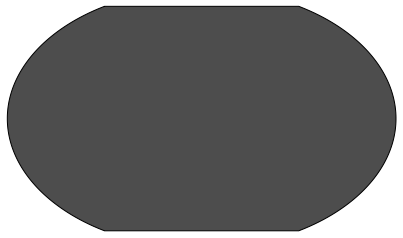

In [11]:
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance without coastlines
m = Basemap(projection='kav7',lon_0=0,resolution=None)
m.drawmapboundary(fill_color='0.3')

Finally, we plot the data onto our world map.

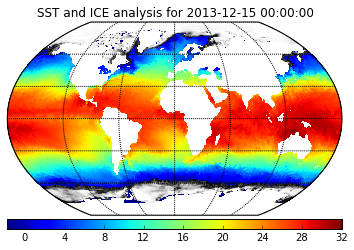

In [13]:
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
plt.title('SST and ICE analysis for %s'%date)
plt.show()